# 1. Preliminary

## 1.1 Context

## 1.2 Imports

In [7]:
import os, sys, time

import nltk
from nltk.stem import WordNetLemmatizer


import spacy

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')

## 1.3 Loading data

In [8]:
# our file

data = "./data/cleaned/"
os.listdir(data)

['df.csv']

In [9]:
# load dataframe

fn = data + 'df.csv'

df = pd.read_csv(fn)

In [10]:
df.head()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509,e,d
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,10.0,2.302585,13,3755,e,c
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",20.0,2.995732,6,5849,e,c
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907,2,5924,e,c
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,5.0,1.609438,10,123,e,d


# 5. Working with text SEPARATE NOTEBOOK

##  5.1 10 random texts 

In [11]:
df.rename(columns={"name" : "_name"}, inplace=True)

In [12]:
df.sample(10)

,_name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
574,Jack-Jack,Jack-Jack is a baby and the youngest child in...,4.0,1.386294,9,3294,e,d
665,Koko (The LEGO Ninjago Movie),Koko met Garmadon in a war under the identity ...,7.0,1.945910,29,313,e,d
140,Bill Harken,Bill Harken is a former FBI agent who strictly...,6.0,1.791759,11,452,e,d
100,Bane (Dark Knight),Put in prison to serve his fathers life senten...,9.0,2.197225,18,490,e,c
1157,Tsunade,Tsunade is a descendant of the Senju clan and ...,15.0,2.708050,7,437,e,c
392,Erik Killmonger,Early Life N'Jadaka's father was pressed into ...,8.0,2.079442,15,6693,e,d
850,Ocean Master,Orm Marius aka Ocean Master is the half-brothe...,13.0,2.564949,12,212,e,c
1179,Vergil,"Vergil, later also known as Nelo Angelo, is on...",16.0,2.772589,6,354,e,c
894,Professor Severus Snape,Severus Snape was born to Tobias Snape and Eil...,23.0,3.135494,23,597,e,c
1105,The Cape,"ince Faraday, an honest police detective who i...",3.0,1.098612,8,1369,e,d


In [13]:
df_samp = df.sample(20)
df_samp

,_name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
657,King Shark (CW),"Shay Lamden, nicknamed King Shark by Patty Spi...",13.0,2.564949,15,1212,e,c
948,Rick Sanchez,Rick Sanchez is the co-eponymous main characte...,19.0,2.944439,12,253,e,c
518,Highfather,"Izaya, at this point known as Izaya the Inheri...",38.0,3.637586,10,3086,e,b
1130,The Thing (FOX),Ben Grimm is the best friend of scientist Reed...,6.0,1.791759,15,6943,e,d
138,Big Daddy,Damon Macready was a comic book geek and an ac...,3.0,1.098612,9,788,e,d
416,Firefist (FOX),Russell grew up in the Essex House for Mutant ...,7.0,1.945910,14,3422,e,d
546,Iceman,"Robert ""Bobby"" Louis Drake was born in Flora...",10.0,2.302585,6,18422,e,c
953,Robin (Titans),"Jason was born to a man and a woman, though th...",5.0,1.609438,14,554,e,d
53,Animal Man,"In his late teens, Buddy was a happy hellraisi...",7.0,1.945910,10,12897,e,d
912,Qui-Gon Jinn,Qui-Gon Jinn was a male human born on the gala...,13.0,2.564949,12,943,e,c


In [14]:
for idx, ser in df_samp.iterrows(): 

    _len = len(ser["history_text"])
    _score = round(ser['_score'], 2)
    _log_score = round(ser['_log_score'], 2)
    _txt = "\t"+ser["history_text"].strip()
    txt_1 = f"name : {ser['_name']}, score/log_score : {_score}/{_log_score}, len_txt :{_len}, history:\n"
    
    print(txt_1+_txt[:300]+ "..." + "\n\n")

name : King Shark (CW), score/log_score : 13.0/2.56, len_txt :1212, history:
	Shay Lamden, nicknamed King Shark by Patty Spivot, is a meta-human with the physical characteristics of a human and a shark. He was hired by Zoom to take out Earth-1's Flash, only to be brought down by Harry Wells and captured and imprisoned by A.R.G.U.S. Though Shay eventually escaped, he was defe...


name : Rick Sanchez, score/log_score : 19.0/2.94, len_txt :253, history:
	Rick Sanchez is the co-eponymous main character and leading protagonist of the show. He is a genius scientist whose alcoholism and reckless, nihilistic behavior are a source of concern for his daughter's family, as well as the safety of their son, Morty...


name : Highfather, score/log_score : 38.0/3.64, len_txt :3086, history:
	Izaya, at this point known as Izaya the Inheritor, was a warrior of New Genesis, husband of Avia, and father of the boy who would become Scott Free. He and his wife were ambushed by Steppenwolf, his nephew Darks

In [15]:
def print_sample(sub_df, n_samp=10, n_char=1000) : 
    """ """
    
    if n_samp < len(sub_df): 
        df_samp = sub_df.sample(n_samp)
    else : 
        df_samp = sub_df.copy()
    
    for idx, ser in df_samp.iterrows(): 

        _len = len(ser["history_text"])
        _score = round(ser['_score'], 2)
        _log_score = round(ser['_log_score'], 2)
        _txt = "\n"+ser["history_text"].strip()
        txt_1 = f"name : {ser['_name']}, score/log_score : {_score}/{_log_score}, len_txt :{_len}, history:\n"

        print(txt_1+_txt[:n_char]+ "..." + "\n\n\n")

In [16]:
df_a = df[df._cat=="a"]
df_a.head()

,_name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
99,Aztar,Since the beginnings of human civilization the...,222.0,5.402677,5,3796,a,a
339,Devilman,Transformation Akira is first seen walking hom...,229.0,5.433722,8,27732,a,a
365,Dracula,The man later known as Dracula was originally...,211.0,5.351858,7,23504,a,a
459,Golden Ninja,"Lloyd becomes the Golden Ninja, and fights the...",226.0,5.420535,12,266,a,a
469,Great Evil Beast,The Great Evil Beast was formed when God utter...,237.0,5.468060,16,5295,a,a


In [17]:
print_sample(df_a)

name : Aztar, score/log_score : 222.0/5.4, len_txt :3796, history:

Since the beginnings of human civilization the Spectre Force, or the Divine Wrath has patrolled the lands of man. Watching, waiting in the night for the unjustly killed, the murdered and the butchered. Then swift judgment gives bloody vengeance to the murderers. Since the birth of Christ, the Wrath has been bonded to a mortal host, to be its moral guide and anchor to humanity. In the twentieth century that anchor was detective Jim Corrigan. As the Spectre they were one of the most powerful beings in the universe.  If we are to believe the texts, three seconds after creation there was a rebellion in Paradise. A rebel band of angels led by Lucifer Morningstar attempted to wrestle control of Heaven from the Presence. As punishment they were cast out to the burning planes of Hell where they became the beings that mortal men know as demons. It is not always realized but is possible for demons of repent, one such repentant d

In [18]:
print_sample(df[df._cat=="b"])

name : Goblin Force, score/log_score : 169.0/5.13, len_txt :1953, history:

The Goblin Force was born at the beginning of reality during the Big Bang. Like the Phoenix Force, it had limitless power, but unlike the Phoenix, it derived power from its ravenous hunger that couldn't be sated. Its hunger lead it to devour entire galaxies when it encountered the Phoenix Force, the Phoenix stood against it only to be consumed. Even Galactus, the devourer of worlds fell to the power of the Goblin Force's hunger. It wasn't until the 5th Host of the Celestials stood against the Goblin Force that it met defeat, though it wasn't destroyed. The Celestials eventually died from the battle, leaving the Goblin force only to be contained.  Many years later, the Goblin Force seized the opportunity to attach itself to the life force of Madelyne Pryor, making her its conduit into the world again, being reborn as the Goblin Queen through the corruption of Madelyne Pryor. As the Goblin Force gradually took ov

In [19]:
print_sample(df[df._cat=="b"])

name : Goblin Force, score/log_score : 169.0/5.13, len_txt :1953, history:

The Goblin Force was born at the beginning of reality during the Big Bang. Like the Phoenix Force, it had limitless power, but unlike the Phoenix, it derived power from its ravenous hunger that couldn't be sated. Its hunger lead it to devour entire galaxies when it encountered the Phoenix Force, the Phoenix stood against it only to be consumed. Even Galactus, the devourer of worlds fell to the power of the Goblin Force's hunger. It wasn't until the 5th Host of the Celestials stood against the Goblin Force that it met defeat, though it wasn't destroyed. The Celestials eventually died from the battle, leaving the Goblin force only to be contained.  Many years later, the Goblin Force seized the opportunity to attach itself to the life force of Madelyne Pryor, making her its conduit into the world again, being reborn as the Goblin Queen through the corruption of Madelyne Pryor. As the Goblin Force gradually took ov

In [20]:
print_sample(df[df._cat=="c"])

name : Destruction Of The Endless, score/log_score : 112.0/4.72, len_txt :97, history:

Destruction is the fourth eldest of the Endless. He is the embodiment of destruction and creation...



name : Doctor Strange (Classic), score/log_score : 120.0/4.79, len_txt :38541, history:

Stephen Strange was born to Eugene and Beverly Strange in 1930 while the couple was vacationing in Philadelphia. In 1932 Stephen's sister Donna was born at the family's Nebraska farm. Knowing that Strange was destined to become the next Sorcerer Supreme, resentful apprentice sorcerer Karl Mordo beset the child with demons from the age of eight, and on throughout his youth. Ultimately Strange was rescued by Mordo's master, the Ancient One, mystic protector of the Earth-realm as the current Sorcerer Supreme. A year or two after this torment began, Stephen's brother, Victor, was born. At age eleven Strange aided an injured Donna, an experience which ultimately fostered an interest in medicine. Strange entered New

In [21]:
print_sample(df[df._cat=="d"])

name : Imperiex, score/log_score : 87.0/4.47, len_txt :854, history:

The embodiment of entropy, Imperiex takes the form of pure energy contained inside a humanoid set of armor, colossal in size. He was first seen when Mongul, the son of the deceased villain of the same name, arrived on Earth stating that Imperiex had destroyed Warworld and was heading for Earth. Mongul convinced Superman to help him fight Imperiex, and the two managed to defeat it. However, it transpired that the "Imperiex" they had encountered was no more than a probe, whereas Imperiex Prime, leader of the Imperieces, was himself a much larger and more powerful being. He had detected imperfections in the fabric of the universe, and his ultimate plan was to destroy it and create a new, perfect one. To do so, Imperiex Prime headed for Earth, the planet which held the universe together, in order to destroy it and therefore induce a new Big Bang....



name : John Constantine (Power Of Shazam), score/log_score : 82.0/4.4

In [22]:
print_sample(df[df._cat=="e"])

name : Katana, score/log_score : 6.0/1.79, len_txt :301, history:

Tatsu Yamashiro is Katana, a Japanese sword-wielding superhero who has been a member of the Suicide Squad, the Outsiders, the Justice League of America and the Birds of Prey. Her primary weapon is her sword, "Soultaker," which is said to capture the souls of anyone killed by it, including her husband...



name : Thor Girl, score/log_score : 12.0/2.48, len_txt :3083, history:

In the beginning of time, alien sorcerer X'Hoss foretells the creation of the Designate, who will help evolve sentient beings to the next level of existence. Billions of years later, Tarene is born. She is told about the fate of the evil Destroyer and together with others seeks a way to stop him. In the meantime, Thanos obtains X'Hoss' knowledge and destroys Tarene's home-world. She gains the help of Thor and Orikal in defeating the villain.  Tarene later transforms herself into an Asgardian goddess and becomes Thor's loyal ally, taking the name "

# work on One

In [23]:
txt = df.history_text.sample(1)
txt = txt.values[0]
txt

'An artificial being created by the terrorist group A.I.M. for their evil plans to assassinate Captain America, it holds a fragment of the Cosmic Cube that serves as its limitless power source and can copy the powers of any being it wants.'

In [24]:
txt = txt.lower()
txt

'an artificial being created by the terrorist group a.i.m. for their evil plans to assassinate captain america, it holds a fragment of the cosmic cube that serves as its limitless power source and can copy the powers of any being it wants.'

In [25]:
txt = txt.strip().replace("  ", " ")

In [26]:
txt[:30]

'an artificial being created by'

In [27]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize

In [28]:
raw_tokens_list  = word_tokenize(txt)
raw_tokens_list[:30]

['an',
 'artificial',
 'being',
 'created',
 'by',
 'the',
 'terrorist',
 'group',
 'a.i.m',
 '.',
 'for',
 'their',
 'evil',
 'plans',
 'to',
 'assassinate',
 'captain',
 'america',
 ',',
 'it',
 'holds',
 'a',
 'fragment',
 'of',
 'the',
 'cosmic',
 'cube',
 'that',
 'serves',
 'as']

In [29]:
len(raw_tokens_list)

45

In [30]:
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'few', "couldn't", "should've", 'do', "it's", 'we', "mustn't", 'shan', 'y', 'its', 'once', 'most', 'those', 'doesn', 've', "isn't", 'them', 'his', "didn't", 'in', 'too', 'my', 'all', 'her', 'wasn', 'because', 'll', 'out', "haven't", 'hers', 'why', 'into', 'theirs', 'themselves', 'she', "wasn't", 'nor', 'herself', 'have', 'each', 'off', 'there', 'they', 'below', 'been', 'where', 'up', 'some', 'm', 'if', 'me', 'and', "weren't", 'very', 'just', 'yours', "you're", 'doing', 'he', 'here', 's', 'down', 'own', 'about', 'are', 'this', "needn't", "that'll", 'you', 'between', 'was', 'is', "shouldn't", 'more', 'ours', 'o', 'than', 'am', 'ourselves', 'hadn', 'with', 'while', 't', 'yourselves', 'aren', 'that', 'how', 'by', 'yourself', 'the', 'over', 'be', 'wouldn', 'him', 'couldn', 'for', "you've", 'during', 'their', 'both', 'above', 'further', 'will', 'shouldn', 'such', 'not', 'does', 'should', 'which', 'ma', 'were', 'whom', 'did', 'can', 'haven', 'from', 'didn', 'before', "won't", "wouldn't", 'as

In [33]:
cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

In [34]:
cleaned_tokens_list[:50]

['artificial',
 'created',
 'terrorist',
 'group',
 'a.i.m',
 '.',
 'evil',
 'plans',
 'assassinate',
 'captain',
 'america',
 ',',
 'holds',
 'fragment',
 'cosmic',
 'cube',
 'serves',
 'limitless',
 'power',
 'source',
 'copy',
 'powers',
 'wants',
 '.']

In [35]:
len(cleaned_tokens_list)

24

In [36]:
from nltk.tokenize import RegexpTokenizer

In [37]:



raw_tokens_list[:50]

['an',
 'artificial',
 'being',
 'created',
 'by',
 'the',
 'terrorist',
 'group',
 'a.i.m',
 '.',
 'for',
 'their',
 'evil',
 'plans',
 'to',
 'assassinate',
 'captain',
 'america',
 ',',
 'it',
 'holds',
 'a',
 'fragment',
 'of',
 'the',
 'cosmic',
 'cube',
 'that',
 'serves',
 'as',
 'its',
 'limitless',
 'power',
 'source',
 'and',
 'can',
 'copy',
 'the',
 'powers',
 'of',
 'any',
 'being',
 'it',
 'wants',
 '.']

In [38]:
raw_tokens_list

['an',
 'artificial',
 'being',
 'created',
 'by',
 'the',
 'terrorist',
 'group',
 'a.i.m',
 '.',
 'for',
 'their',
 'evil',
 'plans',
 'to',
 'assassinate',
 'captain',
 'america',
 ',',
 'it',
 'holds',
 'a',
 'fragment',
 'of',
 'the',
 'cosmic',
 'cube',
 'that',
 'serves',
 'as',
 'its',
 'limitless',
 'power',
 'source',
 'and',
 'can',
 'copy',
 'the',
 'powers',
 'of',
 'any',
 'being',
 'it',
 'wants',
 '.']

In [39]:
cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

In [40]:
cleaned_tokens_list[:50]

['artificial',
 'created',
 'terrorist',
 'group',
 'a.i.m',
 '.',
 'evil',
 'plans',
 'assassinate',
 'captain',
 'america',
 ',',
 'holds',
 'fragment',
 'cosmic',
 'cube',
 'serves',
 'limitless',
 'power',
 'source',
 'copy',
 'powers',
 'wants',
 '.']

In [41]:
len(cleaned_tokens_list)

24

In [42]:
def process_text(txt, rejoin=False) : 
    
    txt = txt.lower().strip()
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [43]:
corpus = list(df.history_text.values)
corpus[:3]

["Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he tested positive for steroids, he lost his three gold medals. In despair, he turned to religion, specifically the Triune Understanding. This group's founder, Jonathan Tremont, had found one of three fragments of a mysterious object and used it to give Garrett the powers of 3-D Man. Garrett assumed that his powers were because of his newfound spiritual enlightenment, and Tremont never disabused him of the notion.",
 'He was one of the many prisoners of Indian Hill to be transferred to another facility upstate on the orders of The Court. However, Fish Mooney hijacks the bus and drives it into Gotham City, where the bus crashes when fired upon by Butch Gilzean and his gang. After the mobsters flee at the sight of a resurrected Fish, she herself leaves the scene. An elderly hobo lady hears the cries of the prisoners and releases them, only to be horrified by their monstrous appearance. The monst

In [44]:
corpus = "".join(corpus)
corpus[:5000]

'Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he tested positive for steroids, he lost his three gold medals. In despair, he turned to religion, specifically the Triune Understanding. This group\'s founder, Jonathan Tremont, had found one of three fragments of a mysterious object and used it to give Garrett the powers of 3-D Man. Garrett assumed that his powers were because of his newfound spiritual enlightenment, and Tremont never disabused him of the notion.He was one of the many prisoners of Indian Hill to be transferred to another facility upstate on the orders of The Court. However, Fish Mooney hijacks the bus and drives it into Gotham City, where the bus crashes when fired upon by Butch Gilzean and his gang. After the mobsters flee at the sight of a resurrected Fish, she herself leaves the scene. An elderly hobo lady hears the cries of the prisoners and releases them, only to be horrified by their monstrous appearance. The monsters d

In [45]:
cleaned_corpus = process_text(corpus)
cleaned_corpus

['delroy',
 'garrett',
 'jr',
 'grew',
 'become',
 'track',
 'star',
 'competed',
 'olympic',
 'games',
 'tested',
 'positive',
 'steroids',
 'lost',
 'three',
 'gold',
 'medals',
 'despair',
 'turned',
 'religion',
 'specifically',
 'triune',
 'understanding',
 'group',
 'founder',
 'jonathan',
 'tremont',
 'found',
 'one',
 'three',
 'fragments',
 'mysterious',
 'object',
 'used',
 'give',
 'garrett',
 'powers',
 '3',
 'man',
 'garrett',
 'assumed',
 'powers',
 'newfound',
 'spiritual',
 'enlightenment',
 'tremont',
 'never',
 'disabused',
 'notion',
 'one',
 'many',
 'prisoners',
 'indian',
 'hill',
 'transferred',
 'another',
 'facility',
 'upstate',
 'orders',
 'court',
 'however',
 'fish',
 'mooney',
 'hijacks',
 'bus',
 'drives',
 'gotham',
 'city',
 'bus',
 'crashes',
 'fired',
 'upon',
 'butch',
 'gilzean',
 'gang',
 'mobsters',
 'flee',
 'sight',
 'resurrected',
 'fish',
 'leaves',
 'scene',
 'elderly',
 'hobo',
 'lady',
 'hears',
 'cries',
 'prisoners',
 'releases',
 'horrif

In [46]:
len(cleaned_corpus)

490183

In [47]:
tmp = pd.Series(cleaned_corpus).value_counts()

In [48]:
len(df)

1249

In [49]:
tmp.describe()

count    28454.000000
mean        17.227209
std         69.723289
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       2289.000000
dtype: float64

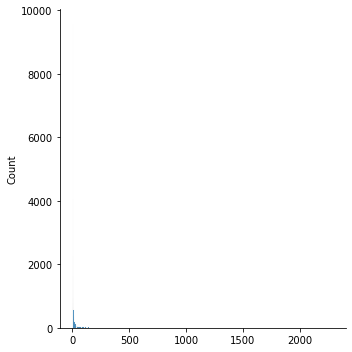

In [50]:
sns.displot(tmp.values)

In [51]:
tmp.head(30)

time          2289
new           2244
x             2229
man           2155
one           2125
would         2047
later         1857
however       1648
earth         1577
team          1517
back          1438
men           1402
also          1314
power         1293
life          1215
sonic         1213
could         1196
powers        1183
became        1157
two           1136
world         1103
battle        1094
death         1090
help          1053
first         1053
eventually    1000
found          992
black          973
father         973
returned       947
dtype: int64

In [52]:
tmp.tail(30)

monaghan        1
sidhe           1
ectoplasm       1
countess        1
ilona           1
kakosy          1
raskine         1
infamy          1
firefighting    1
mania           1
shayera         1
206             1
aldus           1
hath            1
trotting        1
jumble          1
zauriel         1
roch            1
stonechat       1
katar           1
amicable        1
hol             1
byth            1
pyromaniac      1
pseudonym       1
2166            1
potentials      1
maroon          1
aberrations     1
misjudged       1
dtype: int64

In [53]:
# sns.countplot(pd.Series(cleaned_corpus))

/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/IPython

Error in callback <function flush_figures at 0x7ff1b0b64a60> (for post_execute):



KeyboardInterrupt



In [54]:
list_unique_words = tmp[tmp==1]
list_unique_words[:30]

combo          1
diverting      1
tryout         1
speedfreek     1
revamps        1
x5edit         1
genre          1
intiative      1
decreeing      1
relocates      1
cliches        1
evacuating     1
1602           1
founds         1
masterpiece    1
adhered        1
tumbalt        1
kalthea        1
loveable       1
aggregation    1
understands    1
midland        1
philly         1
jacobs         1
bladder        1
starcore       1
accedes        1
producers      1
toes           1
thorn          1
dtype: int64

In [55]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['combo',
 'diverting',
 'tryout',
 'speedfreek',
 'revamps',
 'x5edit',
 'genre',
 'intiative',
 'decreeing',
 'relocates',
 'cliches',
 'evacuating',
 '1602',
 'founds',
 'masterpiece',
 'adhered',
 'tumbalt',
 'kalthea',
 'loveable',
 'aggregation',
 'understands',
 'midland',
 'philly',
 'jacobs',
 'bladder',
 'starcore',
 'accedes',
 'producers',
 'toes',
 'thorn']

In [56]:
def process_text(txt, rejoin=False) : 
    
    txt = txt.lower().strip()
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    non_unique_tokens_list = [w for w in cleaned_tokens_list not in list_unique_words]
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) > 3 ]
    
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [57]:
"a12".isalpha()

False

In [58]:
cleaned_corpus[:100]

['delroy',
 'garrett',
 'jr',
 'grew',
 'become',
 'track',
 'star',
 'competed',
 'olympic',
 'games',
 'tested',
 'positive',
 'steroids',
 'lost',
 'three',
 'gold',
 'medals',
 'despair',
 'turned',
 'religion',
 'specifically',
 'triune',
 'understanding',
 'group',
 'founder',
 'jonathan',
 'tremont',
 'found',
 'one',
 'three',
 'fragments',
 'mysterious',
 'object',
 'used',
 'give',
 'garrett',
 'powers',
 '3',
 'man',
 'garrett',
 'assumed',
 'powers',
 'newfound',
 'spiritual',
 'enlightenment',
 'tremont',
 'never',
 'disabused',
 'notion',
 'one',
 'many',
 'prisoners',
 'indian',
 'hill',
 'transferred',
 'another',
 'facility',
 'upstate',
 'orders',
 'court',
 'however',
 'fish',
 'mooney',
 'hijacks',
 'bus',
 'drives',
 'gotham',
 'city',
 'bus',
 'crashes',
 'fired',
 'upon',
 'butch',
 'gilzean',
 'gang',
 'mobsters',
 'flee',
 'sight',
 'resurrected',
 'fish',
 'leaves',
 'scene',
 'elderly',
 'hobo',
 'lady',
 'hears',
 'cries',
 'prisoners',
 'releases',
 'horrif

In [59]:
len(set(cleaned_corpus))

28454

In [60]:



  
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to /home/alex/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [63]:
lemmatizer.lemmatize("cars")

'car'

In [64]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
 
ps = PorterStemmer()

In [65]:
lemm_cleanned_corpus = [lemmatizer.lemmatize(i) for i in cleaned_corpus ]

In [66]:
len(set(lemm_cleanned_corpus))

25671

In [67]:
def process_text(txt, rejoin=True, lemm_or_stemm = "stem") : 
    """global text processing function"""
    
    # lower and strip
    txt = txt.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop unique tokens
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    # keep only len word > 3
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) > 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
    
    #  return a list or a string
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [ ]:
df["cleaned_history"] = df.history_text.apply(lambda i : process_text(i))

In [ ]:
df.history_text

In [ ]:
df.cleaned_history

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer()

In [ ]:
res = tf.fit_transform(df.cleaned_history)

In [ ]:
res

In [ ]:
res = res.toarray()

In [ ]:
res.